# Data for guided-diffusion-tissues

In [2]:
import random
import os
from PIL import Image
import blobfile as bf
import numpy as np
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

from IPython import display

In [3]:
data_dir = '/baldig/bioprojects2/BrownLab/Ptychography/Registered_Images2/high_res'

In [4]:
images = []
for entry in sorted(bf.listdir(data_dir)):
    if not entry.startswith('.'):
        images.append(entry)

In [5]:
len(images)

139

In [6]:
train_samples = ['Slide001-1.tif', 'Slide001-2.tif', 'Slide001-3.tif', 'Slide001-4.tif', 'Slide002-1.tif', 'Slide002-3.tif', 'Slide003-1.tif', 'Slide004-1.tif', 'Slide004-2.tif', 'Slide004-3.tif', 'Slide004-4.tif', 'Slide005-2.tif', 'Slide007-1.tif', 'Slide007-2.tif', 'Slide009-1.tif', 'Slide009-2.tif', 'Slide009-3.tif', 'Slide009-4.tif', 'Slide010-2.tif', 'Slide011-2.tif', 'Slide011-3.tif', 'Slide012-1.tif', 'Slide013-1.tif', 'Slide014-1.tif', 'Slide015-1.tif', 'Slide015-2.tif', 'Slide015-3.tif', 'Slide015-4.tif', 'Slide016-1.tif', 'Slide016-2.tif', 'Slide016-3.tif', 'Slide017-1.tif', 'Slide017-2.tif', 'Slide018-1.tif', 'Slide018-2.tif', 'Slide020-1.tif', 'Slide020-2.tif', 'Slide020-3.tif', 'Slide022-2.tif', 'Slide023-1.tif', 'Slide023-2.tif', 'Slide024-1.tif', 'Slide024-2.tif', 'Slide025-2.tif', 'Slide026-1.tif', 'Slide026-2.tif', 'Slide027-1.tif', 'Slide027-2.tif', 'Slide028-2.tif', 'Slide028-3.tif', 'Slide029-1.tif', 'Slide029-2.tif', 'Slide030-2.tif', 'Slide031-2.tif', 'Slide031-3.tif', 'Slide031-4.tif', 'Slide032-1.tif', 'Slide032-2.tif', 'Slide033-1.tif', 'Slide033-2.tif', 'Slide033-3.tif', 'Slide034-1.tif', 'Slide034-2.tif', 'Slide036-3.tif', 'Slide037-1.tif', 'Slide037-3.tif', 'Slide037-4.tif', 'Slide038-1.tif', 'Slide038-2.tif', 'Slide038-3.tif', 'Slide039-2.tif', 'Slide039-3.tif', 'Slide041-1.tif', 'Slide041-2.tif', 'Slide042-2.tif', 'Slide042-3.tif', 'Slide043-1.tif', 'Slide043-2.tif', 'Slide043-3.tif', 'Slide044-1.tif', 'Slide046-1.tif', 'Slide046-2.tif', 'Slide047-1.tif', 'Slide048-1.tif', 'Slide048-2.tif', 'Slide049-1.tif', 'Slide049-2.tif', 'Slide050-1.tif', 'Slide050-2.tif', 'Slide050-3.tif', 'Slide051-1.tif', 'Slide051-2.tif', 'Slide052-1.tif', 'Slide053-2.tif', 'Slide054-1.tif', 'Slide054-2.tif', 'Slide054-3.tif']

In [7]:
valid_samples = ['Slide002-2.tif', 'Slide003-2.tif', 'Slide005-1.tif', 'Slide008-1.tif', 'Slide008-2.tif', 'Slide010-1.tif', 'Slide011-1.tif', 'Slide011-5.tif', 'Slide011-6.tif', 'Slide019-3.tif', 'Slide022-1.tif', 'Slide022-3.tif', 'Slide023-3.tif', 'Slide025-1.tif', 'Slide028-1.tif', 'Slide029-3.tif', 'Slide030-1.tif', 'Slide032-3.tif', 'Slide036-1.tif', 'Slide036-2.tif', 'Slide037-2.tif', 'Slide039-1.tif', 'Slide042-1.tif', 'Slide044-3.tif', 'Slide046-3.tif', 'Slide047-2.tif', 'Slide053-1.tif']

In [8]:
test_samples = ['Slide008-3.tif', 'Slide011-4.tif', 'Slide013-2.tif', 'Slide014-2.tif', 'Slide019-1.tif', 'Slide019-2.tif', 'Slide022-4.tif', 'Slide031-1.tif', 'Slide034-3.tif', 'Slide035-1.tif', 'Slide044-2.tif', 'Slide045-1.tif', 'Slide045-2.tif', 'Slide045-3.tif', 'Slide052-2.tif']

In [17]:
# No need to run, I already gnerated train/valid/test samples IDs

# random.shuffle(images)

# train_samples = images[:int(0.7*len(images))]
# valid_samples = images[int(0.7*len(images)):int(0.7*len(images)) + int(0.2*len(images))]
# test_samples = images[int(0.7*len(images)) + int(0.2*len(images)):]

In [9]:
len(train_samples)

97

In [10]:
len(valid_samples)

27

In [11]:
len(test_samples)

15

In [12]:
print(sorted(train_samples))

['Slide001-1.tif', 'Slide001-2.tif', 'Slide001-3.tif', 'Slide001-4.tif', 'Slide002-1.tif', 'Slide002-3.tif', 'Slide003-1.tif', 'Slide004-1.tif', 'Slide004-2.tif', 'Slide004-3.tif', 'Slide004-4.tif', 'Slide005-2.tif', 'Slide007-1.tif', 'Slide007-2.tif', 'Slide009-1.tif', 'Slide009-2.tif', 'Slide009-3.tif', 'Slide009-4.tif', 'Slide010-2.tif', 'Slide011-2.tif', 'Slide011-3.tif', 'Slide012-1.tif', 'Slide013-1.tif', 'Slide014-1.tif', 'Slide015-1.tif', 'Slide015-2.tif', 'Slide015-3.tif', 'Slide015-4.tif', 'Slide016-1.tif', 'Slide016-2.tif', 'Slide016-3.tif', 'Slide017-1.tif', 'Slide017-2.tif', 'Slide018-1.tif', 'Slide018-2.tif', 'Slide020-1.tif', 'Slide020-2.tif', 'Slide020-3.tif', 'Slide022-2.tif', 'Slide023-1.tif', 'Slide023-2.tif', 'Slide024-1.tif', 'Slide024-2.tif', 'Slide025-2.tif', 'Slide026-1.tif', 'Slide026-2.tif', 'Slide027-1.tif', 'Slide027-2.tif', 'Slide028-2.tif', 'Slide028-3.tif', 'Slide029-1.tif', 'Slide029-2.tif', 'Slide030-2.tif', 'Slide031-2.tif', 'Slide031-3.tif', 'Slide031

In [13]:
print(sorted(valid_samples))

['Slide002-2.tif', 'Slide003-2.tif', 'Slide005-1.tif', 'Slide008-1.tif', 'Slide008-2.tif', 'Slide010-1.tif', 'Slide011-1.tif', 'Slide011-5.tif', 'Slide011-6.tif', 'Slide019-3.tif', 'Slide022-1.tif', 'Slide022-3.tif', 'Slide023-3.tif', 'Slide025-1.tif', 'Slide028-1.tif', 'Slide029-3.tif', 'Slide030-1.tif', 'Slide032-3.tif', 'Slide036-1.tif', 'Slide036-2.tif', 'Slide037-2.tif', 'Slide039-1.tif', 'Slide042-1.tif', 'Slide044-3.tif', 'Slide046-3.tif', 'Slide047-2.tif', 'Slide053-1.tif']


In [14]:
print(sorted(test_samples))

['Slide008-3.tif', 'Slide011-4.tif', 'Slide013-2.tif', 'Slide014-2.tif', 'Slide019-1.tif', 'Slide019-2.tif', 'Slide022-4.tif', 'Slide031-1.tif', 'Slide034-3.tif', 'Slide035-1.tif', 'Slide044-2.tif', 'Slide045-1.tif', 'Slide045-2.tif', 'Slide045-3.tif', 'Slide052-2.tif']


In [15]:
def is_white(arr):
    white_fraction = np.median(arr) / 255
    if white_fraction >= 0.95 :
        return True
    else:
        return False
    
def is_black(arr):
    black_fraction = np.median(arr) / 255
    if black_fraction <= 0.05 :
        return True
    else:
        return False
    
def _file_name(file_path):
    basename = os.path.basename(file_path)
    file_name = os.path.splitext(basename)[0]
    return file_name

In [16]:
def _list_image_files_train_valid_test(data_dir, valid_samples, test_samples):
    paths = []
    for entry in sorted(bf.listdir(data_dir)):
        if len(paths) < 2: #This is just for faster pipeline testing, comment during actual training
            if not entry.startswith('.'):
                full_path = bf.join(data_dir, entry)
                ext = entry.split(".")[-1]
                if "." in entry and ext.lower() in ["jpg", "jpeg", "png", "gif", "tif"]:
                    paths.append(full_path)
                elif bf.isdir(full_path):
                    paths.extend(_list_image_files_train_valid_test(full_path)) 
        else:
            break

    test_paths = [path for path in paths if _file_name(path) in test_samples]
    valid_paths = [path for path in paths if _file_name(path) in valid_samples]
    train_paths = [path for path in paths if (path not in test_paths) and (path not in valid_paths)]
    
    return train_paths, valid_paths, test_paths

In [17]:
def random_crop_arr_input_target(pil_image_target, pil_image_input, patch_size):

    arr_target = np.array(pil_image_target)
    arr_input = np.array(pil_image_input) 
    crop_y = random.randrange(arr_target.shape[0] - patch_size + 1)
    crop_x = random.randrange(arr_target.shape[1] - patch_size + 1)
    return arr_target[crop_y : crop_y + patch_size, crop_x : crop_x + patch_size], arr_input[crop_y : crop_y + patch_size, crop_x : crop_x + patch_size]

In [18]:
train_paths, valid_paths, test_paths = _list_image_files_train_valid_test(
        data_dir,
        valid_samples,
        test_samples)

In [19]:
patch_size = 128
random_crop = True
random_flip = True

In [20]:
def loader(paths, idx, patch_size, random_crop, random_flip):  
    high_res_path = paths[idx % len(paths)]
    low_res_path = high_res_path.replace('high_res', 'low_res')

    with bf.BlobFile(high_res_path, "rb") as f:
        high_res_pil_image = Image.open(f)
        high_res_pil_image.load()
    with bf.BlobFile(low_res_path, "rb") as f:
        low_res_pil_image = Image.open(f)
        low_res_pil_image.load()

    if high_res_pil_image.size != low_res_pil_image.size:
        return loader(paths, idx+1, patch_size, random_crop, random_flip)

    high_res_pil_image = high_res_pil_image.convert("RGB")
    low_res_pil_image = low_res_pil_image.convert("RGB")

    if random_crop:
        high_res_arr, low_res_arr = random_crop_arr_input_target(
                high_res_pil_image,
                low_res_pil_image,
                patch_size)
        if is_white(high_res_arr) or is_black(high_res_arr):
            return loader(paths, idx, patch_size, random_crop, random_flip)

    if random_flip and random.random() < 0.5:
        high_res_arr = high_res_arr[:, ::-1]
        low_res_arr = low_res_arr[:, ::-1]

    high_res_arr = high_res_arr.astype(np.float32) / 127.5 - 1
    low_res_arr = low_res_arr.astype(np.float32) / 127.5 - 1

    out_dict = {}
    out_dict["low_res"] = low_res_arr
    return high_res_arr, out_dict


## No unalighned data

In [21]:
paths = train_paths + valid_paths + test_paths
for idx in range(len(paths)):
    high_res_path = paths[idx]
    low_res_path = high_res_path.replace('high_res', 'low_res')

    with bf.BlobFile(high_res_path, "rb") as f:
        high_res_pil_image = Image.open(f)
    with bf.BlobFile(low_res_path, "rb") as f:
        low_res_pil_image = Image.open(f)

    if high_res_pil_image.size != low_res_pil_image.size:
        print(high_res_pil_image.size, low_res_pil_image.size)

High resolution


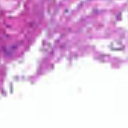

Low resolution


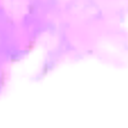

High resolution


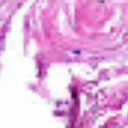

Low resolution


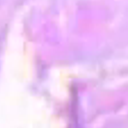

In [24]:
paths = train_paths + valid_paths + test_paths
for idx in range(len(paths)):
    data, kwargs = loader(paths, idx, patch_size, random_crop, random_flip)
    data = transforms.ToPILImage()(np.uint8((data + 1)*127.5)).convert("RGB")
    print('High resolution')
    display.display(data)
    low_res = kwargs["low_res"]
    low_res = transforms.ToPILImage()(np.uint8((low_res+ 1)*127.5)).convert("RGB")
    print('Low resolution')
    display.display(low_res)
    print('===========================')